In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
np.random.seed(42)
X = np.random.rand(100,1) -0.5
y = 3*X[:,0]**2 +0.05*np.random.randn(100)

# added some randomness using 0.05*np.random.randn(100)

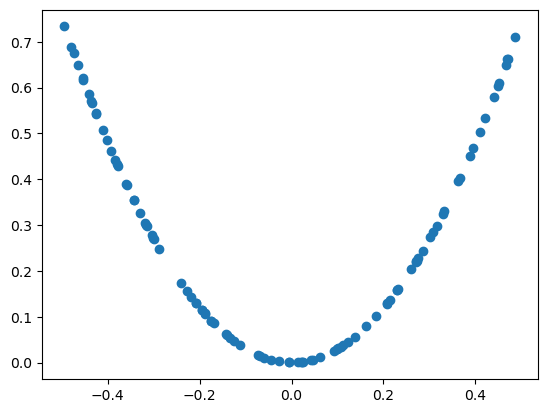

In [3]:
plt.scatter(X,3*X[:,0]**2)

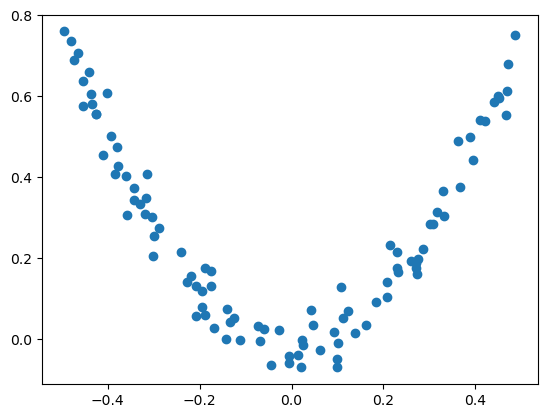

In [4]:
plt.scatter(X,y)
# With Randomness

In [5]:
df = pd.DataFrame()
df["X"] = X.reshape(100)
df["y"] = y

In [6]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


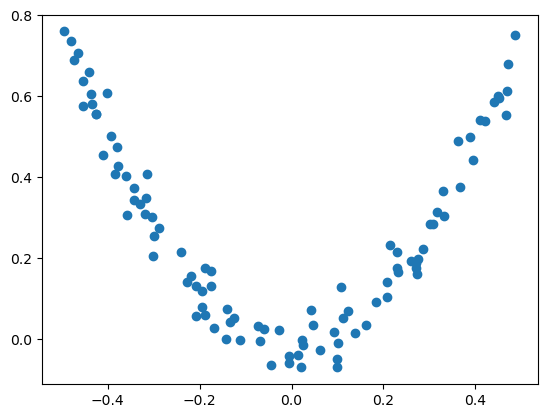

In [7]:
plt.scatter(df["X"],df["y"])

In [8]:
# Step 1 - Finding out the mean of target

In [9]:
df["pred1"] = df["y"].mean()

In [10]:
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [11]:
# Step 2 - Calculating psudo residual

In [12]:
df["res1"] = df["y"] - df["pred1"]

In [13]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


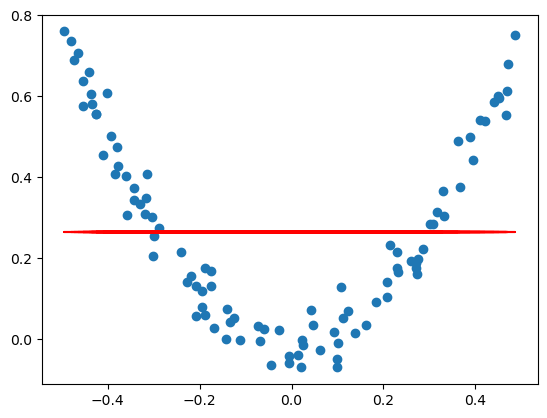

In [14]:
plt.scatter(df["X"],df["y"])
plt.plot(df["X"],df["pred1"], color = "red")
# red is the my M1 model that is mean

In [15]:
# Step 3 - Building a decision tree

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
# In gradient boost unlike adaboost we dont take stumps but rather take max_leaf_nodes between 8 & 32
# here we use bit bigger decision trees
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [18]:
tree1.fit(df["X"].values.reshape(100,1), df["res1"].values)

DecisionTreeRegressor(max_leaf_nodes=8)

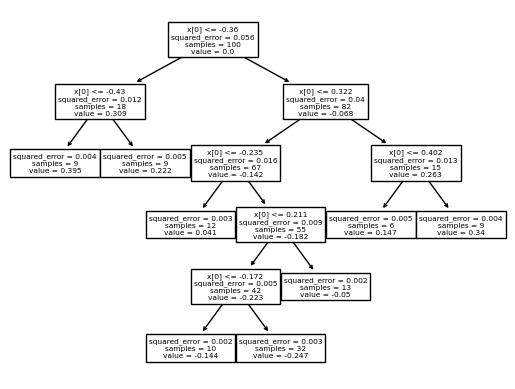

In [19]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [20]:
# Step 4 - Creating new test set

In [21]:
# Generating X_test
X_test = np.linspace(-0.5,0.5,500)
# 500 points between -0.5 & 0.5

In [22]:
# We are adding output of model 1 & output of model 2
# Model 1 is just the mean
# Model 2 is the decision tree
y_pred = 0.265 + tree1.predict(X_test.reshape(500,1))

In [23]:
# Step 5 - Prediction of model1 + Model2

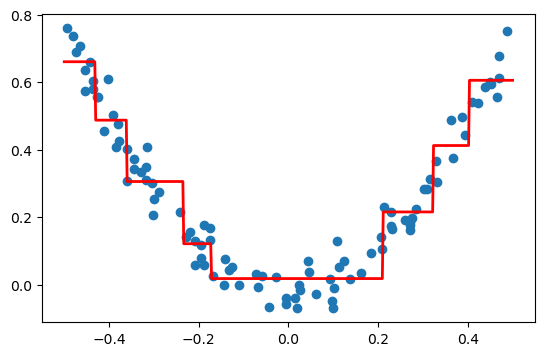

In [24]:
plt.figure(figsize = (14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth = 2, color = "r")
plt.scatter(df["X"],df["y"])

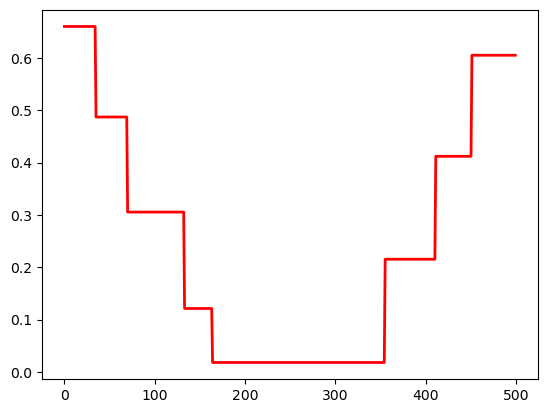

In [25]:
plt.plot(y_pred, linewidth = 2, color = "r")

In [26]:
# Step 5 - Prediction of model1 + Model2

In [27]:
df["pred2"] = 0.265 + tree1.predict(df["X"].values.reshape(100,1))

In [28]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.017861
1,0.450714,0.594480,0.265458,0.329021,0.605426
2,0.231994,0.166052,0.265458,-0.099407,0.215326
3,0.098658,-0.070178,0.265458,-0.335636,0.017861
4,-0.343981,0.343986,0.265458,0.078528,0.305506
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.017861
96,0.022733,-0.002305,0.265458,-0.267763,0.017861
97,-0.072459,0.032809,0.265458,-0.232650,0.017861
98,-0.474581,0.689516,0.265458,0.424057,0.660454


In [29]:
# Step 6 - calculating residual 2

In [30]:
df["res2"] = df["y"] - df["pred2"]

In [31]:
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.017861,0.033712
1,0.450714,0.594480,0.265458,0.329021,0.605426,-0.010946
2,0.231994,0.166052,0.265458,-0.099407,0.215326,-0.049274
3,0.098658,-0.070178,0.265458,-0.335636,0.017861,-0.088039
4,-0.343981,0.343986,0.265458,0.078528,0.305506,0.038480
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.017861,-0.058536
96,0.022733,-0.002305,0.265458,-0.267763,0.017861,-0.020166
97,-0.072459,0.032809,0.265458,-0.232650,0.017861,0.014947
98,-0.474581,0.689516,0.265458,0.424057,0.660454,0.029062


In [32]:
# Step 7 - building decision tree again

In [33]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [34]:
tree2.fit(df["X"].values.reshape(100,1), df["res2"].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [35]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [tree1, tree2])

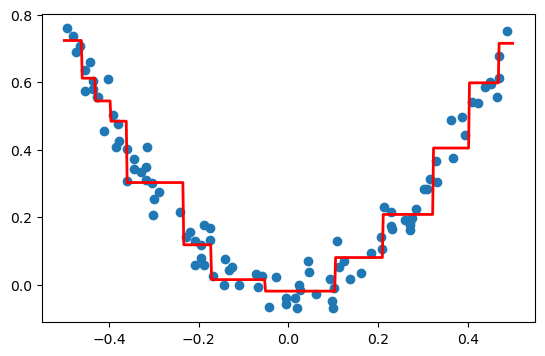

In [36]:
plt.figure(figsize = (14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth = 2, color = "r")
plt.scatter(df["X"],df["y"])

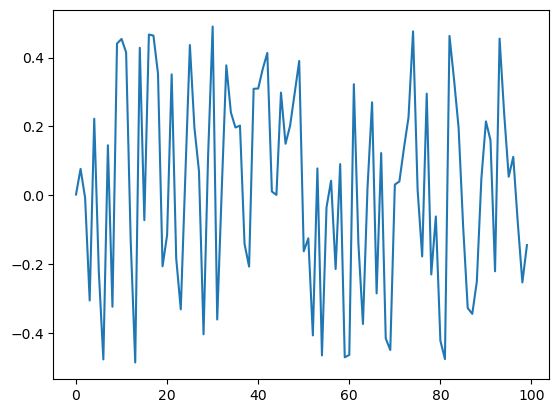

In [37]:
plt.plot(np.random.rand(100,1) -0.5)

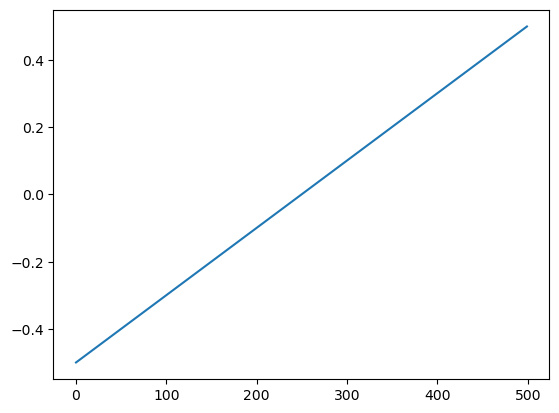

In [38]:
plt.plot(X_test.reshape(500,1))

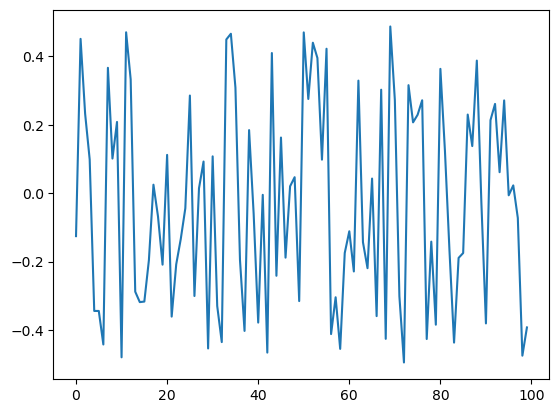

In [39]:
plt.plot(X.reshape(100,1))

In [40]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

            
            

5


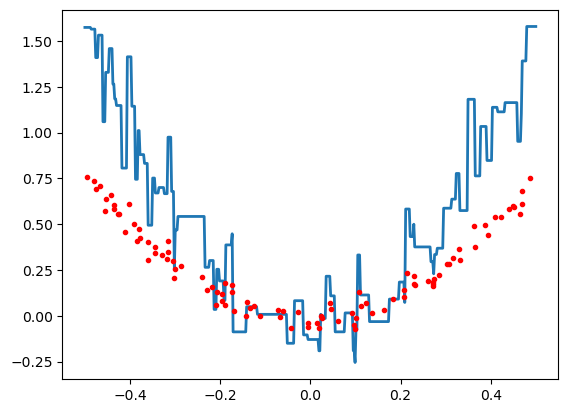

4


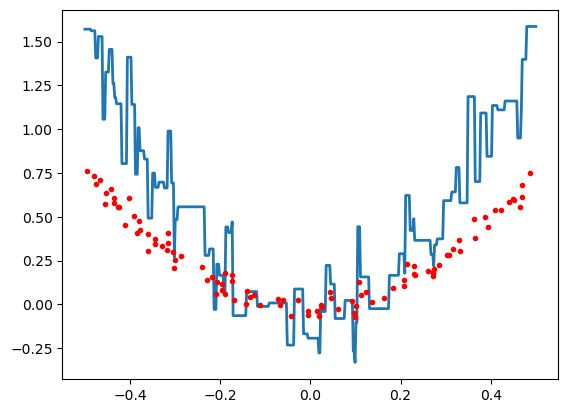

3


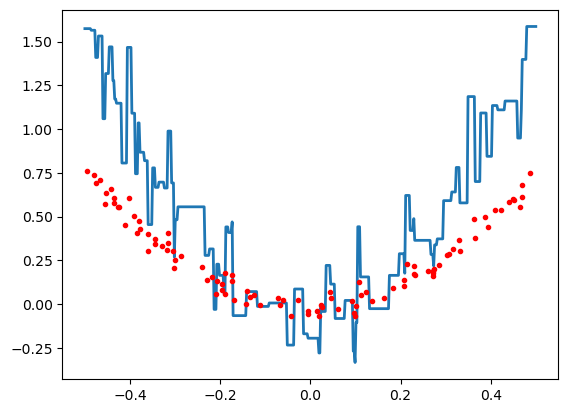

2


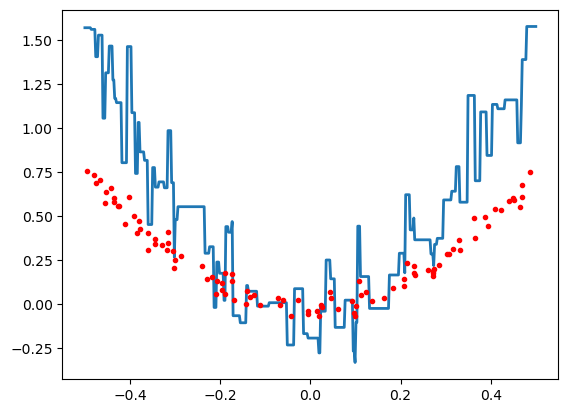

1


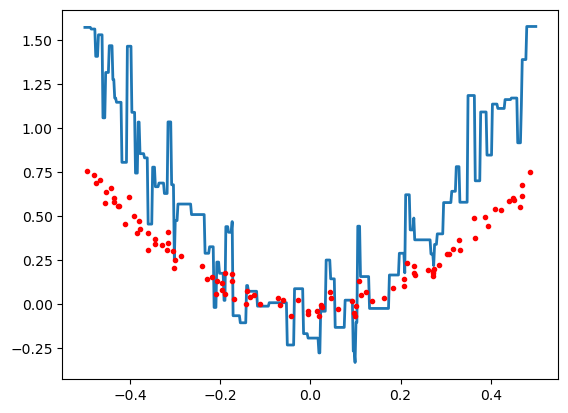

In [42]:

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)
     

# Mathematical working of Gradient Boost

In [43]:
data = pd.read_csv("./data/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [44]:
# We will not work with State column

In [45]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [46]:
data = data[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']]

In [47]:
data.shape

(50, 4)

In [48]:

df = data.sample(3)
df = round(df/1000)

In [49]:
df

,R&D Spend,Administration,Marketing Spend,Profit
43,16.0,127.0,36.0,70.0
41,28.0,85.0,164.0,78.0
15,115.0,123.0,262.0,130.0


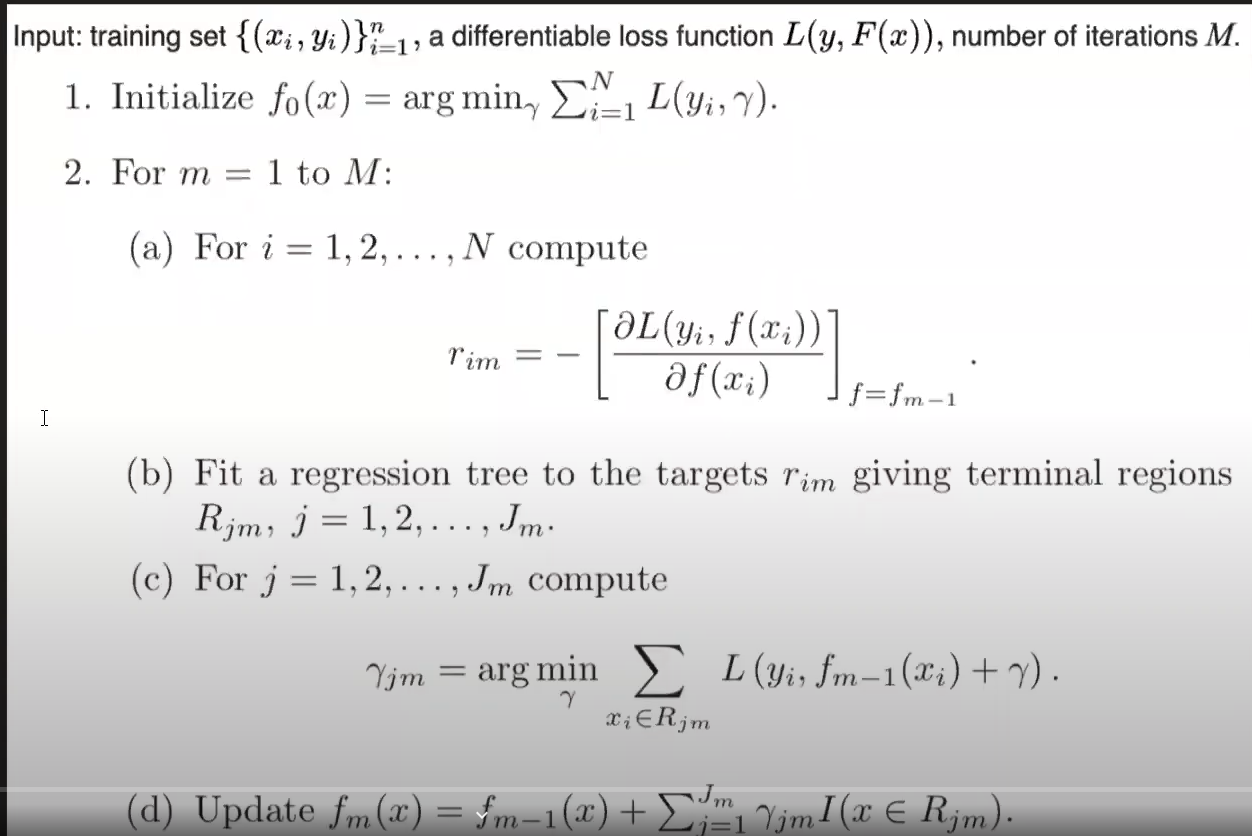

- n - no. of rows
- x1 - 1st row without target
- x2 - 2nd row without target
- x3 - 3rd row without target

- y1 - 1st row target
- y2 - 2nd row target
- y3 - 3rd row target

-  L loss funciton - how much error the model has produced

-L(Y,F(X)) -> L(Y,Yhat) both are same
- M is the number of decision tree
- in step (a) r is the residual for each row 

In [51]:
# Step 1 - calculating mean
df["f0(x)"] = df["Profit"].mean()
df

,R&D Spend,Administration,Marketing Spend,Profit,f0(x)
43,16.0,127.0,36.0,70.0,92.666667
41,28.0,85.0,164.0,78.0,92.666667
15,115.0,123.0,262.0,130.0,92.666667


In [54]:
# Step 2 calculating residual
df["ri1"] = df["Profit"] - df["f0(x)"]

In [55]:
df

,R&D Spend,Administration,Marketing Spend,Profit,f0(x),ri1
43,16.0,127.0,36.0,70.0,92.666667,-22.666667
41,28.0,85.0,164.0,78.0,92.666667,-14.666667
15,115.0,123.0,262.0,130.0,92.666667,37.333333


In [56]:
# Step 3 - Building a decision tree

In [57]:
from sklearn.tree import DecisionTreeRegressor
# max_depth = 1 as our dataset is very small. Otherwise it should be between 8 & 32
dt1 = DecisionTreeRegressor(max_depth = 1)

In [58]:
dt1.fit(df.iloc[:,0:3].values, df["ri1"].values)

DecisionTreeRegressor(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 71.5\nsquared_error = 707.556\nsamples = 3\nvalue = -0.0'),
 Text(0.25, 0.25, 'squared_error = 16.0\nsamples = 2\nvalue = -18.667'),
 Text(0.75, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 37.333')]

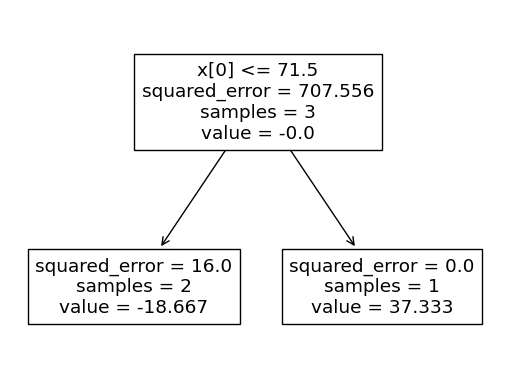

In [59]:
# Plotting tree
from sklearn.tree import plot_tree
plot_tree(dt1)

- Terminal regions are the partions made by the tree 
- R11 - terminal region 1 of 1st decision tree
- R21 - terminal region 2 of 1st decision tree

- value in the tree above is the prediciton made by the tree
- 37.33 we already have the value of ri1
- -18.667 is the mean of other two predicted values

- Gradient boosting value is calculated by gammaJM in the above image
- For Lease Square the loss of decision tree & Gradient boost is same but if we use some other loss fucntion then they both would be different.